In [123]:
import numpy as np
import pandas as pd
import pprint as pp
import matplotlib

%matplotlib inline

In [109]:
# sample size and total population size
n = 25
h = 200
N = 1000

In [110]:
s1 = np.random.randint(1,200,h)
s2 = np.random.randint(200,400,h)
s3 = np.random.randint(400,600,h)
s4 = np.random.randint(600,800,h)
s5 = np.random.randint(800,1000,h)
s = np.concatenate((s1,s2,s3,s4,s5))
pmean = np.mean(s)

In [111]:
pp.pprint('population mean: {}'.format(pmean))

'population mean: 498.531'


In [112]:
sample = np.random.choice(s,n)
srsmean = np.mean(sample)
pp.pprint('simple random sample mean: {}'.format(srsmean))

'simple random sample mean: 535.28'


In [113]:
w_h = h / N 
p_alloc = int(n*(h/N))

s1_mean = np.mean(np.random.choice(s1,p_alloc))
s2_mean = np.mean(np.random.choice(s2,p_alloc))
s3_mean = np.mean(np.random.choice(s3,p_alloc))
s4_mean = np.mean(np.random.choice(s4,p_alloc))
s5_mean = np.mean(np.random.choice(s5,p_alloc))

ssmean = w_h * s1_mean + w_h * s2_mean + w_h * s3_mean + w_h * s4_mean + w_h * s5_mean
pp.pprint('Proportional allocation: {}'.format(p_alloc))
pp.pprint('stratified random sampling mean: {}'.format(ssmean))

'Proportional allocation: 5'
'stratified random sampling mean: 508.76'


In [114]:
pp.pprint('simple random sample mean difference pop. mean: {}'.format(pmean - srsmean))
pp.pprint('stratified random sample mean difference pop. mean: {}'.format(pmean - ssmean))

'simple random sample mean difference pop. mean: -36.74899999999997'
'stratified random sample mean difference pop. mean: -10.228999999999985'


In [116]:
def simulation(repeat = 1000):
    sim_results = []
    for i in range(0,1000,1):
        s1 = np.random.randint(1,200,h)
        s2 = np.random.randint(200,400,h)
        s3 = np.random.randint(400,600,h)
        s4 = np.random.randint(600,800,h)
        s5 = np.random.randint(800,1000,h)
        s = np.concatenate((s1,s2,s3,s4,s5))
        pmean = np.mean(s)
        
        sample = np.random.choice(s,n)
        srsmean = np.mean(sample)
        
        w_h = h / N 
        p_alloc = int(n*(h/N))
        s1_mean = np.mean(np.random.choice(s1,p_alloc))
        s2_mean = np.mean(np.random.choice(s2,p_alloc))
        s3_mean = np.mean(np.random.choice(s3,p_alloc))
        s4_mean = np.mean(np.random.choice(s4,p_alloc))
        s5_mean = np.mean(np.random.choice(s5,p_alloc))
        ssmean = w_h * s1_mean + w_h * s2_mean + w_h * s3_mean + w_h * s4_mean + w_h * s5_mean
        sim_results.append((abs(pmean - srsmean), abs(pmean - ssmean)))
    return sim_results

In [117]:
s_r = simulation()

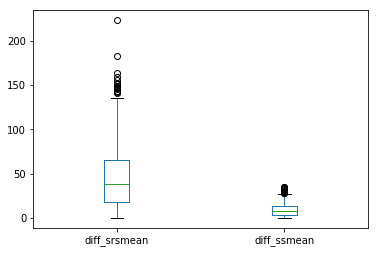

In [125]:
pd.DataFrame(s_r, columns=['diff_srsmean', 'diff_ssmean']).plot.box()